In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок


stud = pd.read_csv('stud_math.csv')

In [2]:
# рассмотрим данные
stud.rename(columns=lambda x: x.replace(
    'studytime, granular', 'studytime_granular'), inplace=True)
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [3]:
# Посчитаем среднее колличество пропусков, чтобы понять каких данных не хватает
for col in stud.columns:
    pct_missing = stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime_granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%


In [4]:
# Мы видим, что  в некоторых столбцах потеряно до 11% данных, рассмотрим подробнее

,school
GP,349
MS,46


<AxesSubplot:xlabel='score', ylabel='school'>

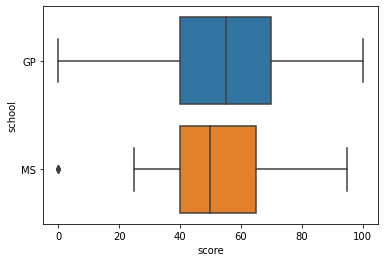

In [5]:
# Школа
# рассмотрим распределение признака, пропусков в данных нет
display(pd.DataFrame(stud.school.value_counts()))
sns.boxplot(x='score', y='school',
            data=stud)

,sex
F,208
M,187


<AxesSubplot:xlabel='score', ylabel='sex'>

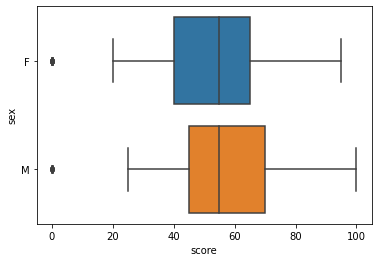

In [6]:
# Пол
# рассмотрим распределение признака,пропусков в данных нет
display(pd.DataFrame(stud.sex.value_counts()))
sns.boxplot(x='score', y='sex',
            data=stud)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

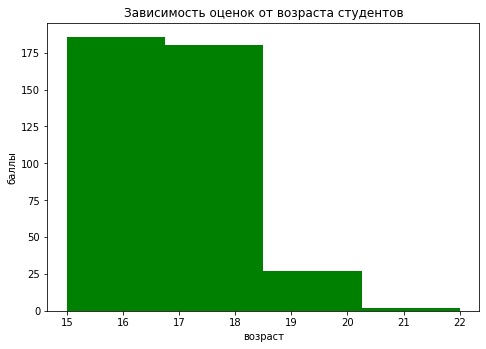

In [7]:
# Возраст
# рассмотрим распределение признака, пропусков нет
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['age'], bins=4, color='green')
axes.set_title('Зависимость оценок от возраста студентов')
axes.set_ylabel('баллы')
axes.set_xlabel('возраст')
stud.age.describe()

In [8]:
# большой возрастной разброс между студентами, но выбросов нет, тк это описано в условиях задачи

In [9]:
# адрес
# заменим пустые значения модой
stud.address.fillna(stud.address.mode()[0], inplace=True)
stud.address.value_counts()

U    312
R     83
Name: address, dtype: int64

In [10]:
# размер семьи
# заменим пустые значения модой
stud.famsize.fillna(stud.famsize.mode()[0], inplace=True)
stud.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

<AxesSubplot:xlabel='score', ylabel='famsize'>

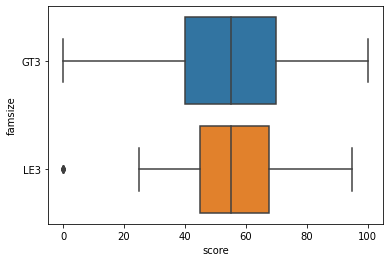

In [11]:
# рассмотрим распределение признака
sns.boxplot(x='score', y='famsize',
            data=stud)

In [12]:
# статус совместного жилья родителей, пустые значения заменяем модой

stud.Pstatus.fillna(stud.Pstatus.mode()[0], inplace=True)
stud.Pstatus.value_counts()

# основном родители учеников живут вместе

T    359
A     36
Name: Pstatus, dtype: int64

Text(0.5, 0, 'образование матери')

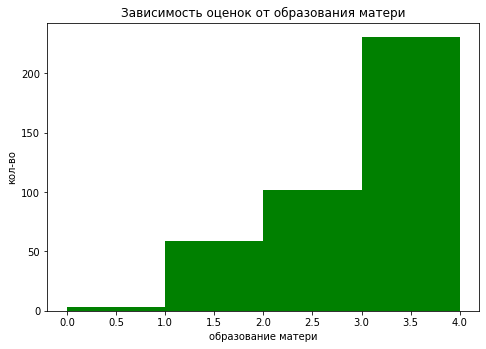

In [13]:
# образование матери
# заменим пустые значения в образовании матери на моду
stud.Medu.fillna(stud.Medu.mode()[0], inplace=True)
stud.Medu.value_counts()

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['Medu'], bins=4, color='green')
axes.set_title('Зависимость оценок от образования матери')
axes.set_ylabel('кол-во')
axes.set_xlabel('образование матери')

# студентов, чьи матери имеют высшее образование больше

Text(0.5, 0, 'образование отца')

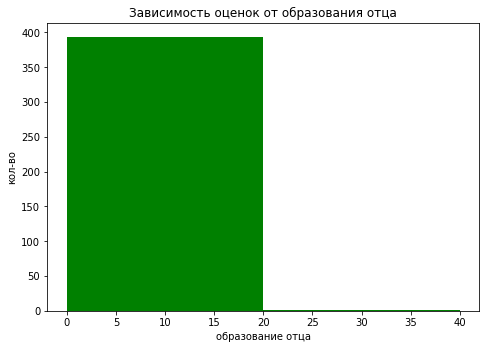

In [14]:
# образование отца
# заменим пустые значения в образовании отца на моду
stud.Fedu.fillna(stud.Fedu.mode()[0], inplace=True)
stud.Fedu.value_counts()

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['Fedu'], bins=2, color='green')
axes.set_title('Зависимость оценок от образования отца')
axes.set_ylabel('кол-во')
axes.set_xlabel('образование отца')

# учеников, чьи отцы не имеют образования или имеют начальное -больше

count       395
unique        5
top       other
freq        152
Name: Mjob, dtype: object

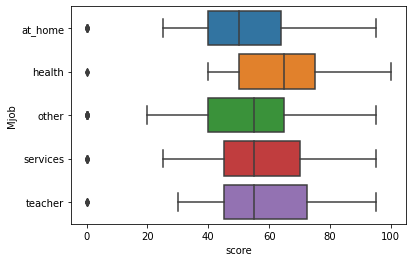

In [15]:
# работа матери, заменяем отсутствующие данные модой
stud.Mjob.fillna(stud.Mjob.mode()[0], inplace=True)
stud.Mjob.value_counts()

# посмотрим на распределение признака
sns.boxplot(x='score', y='Mjob',
            data=stud)
stud.Mjob.describe()
# по боксплоту видно, что ученики, чьи матери работают в сфере Здравоохранения, учатся лучше

count       395
unique        5
top       other
freq        233
Name: Fjob, dtype: object

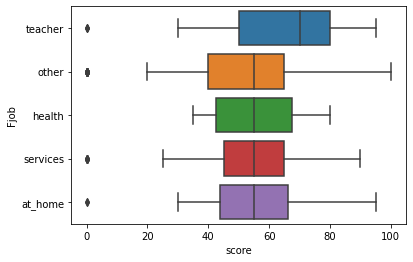

In [16]:
# работа отца, заменяем отсутствующие данные модой
stud.Fjob.fillna(stud.Fjob.mode()[0], inplace=True)
stud.Fjob.value_counts()

# посмотрим на распределение признака
sns.boxplot(x='score', y='Fjob',
            data=stud)
stud.Fjob.describe()
# по боксплоту видно, что ученики, чьи отцы -Учителя, учатся лучше

count        395
unique         4
top       course
freq         154
Name: reason, dtype: object

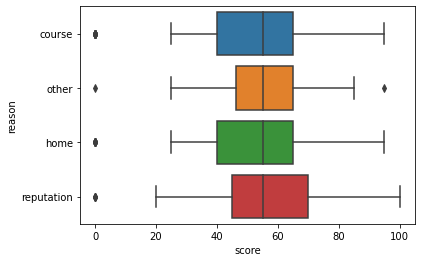

In [17]:
# причина выбора школы, заменяем отсутствующие данные модой
stud.reason.fillna(stud.reason.mode()[0], inplace=True)
stud.reason.value_counts()

# посмотрим на распределение признака
sns.boxplot(x='score', y='reason',
            data=stud)
stud.reason.describe()

# есть выбросы, но средняя оценка приблизительно одинакова

count        395
unique         3
top       mother
freq         281
Name: guardian, dtype: object

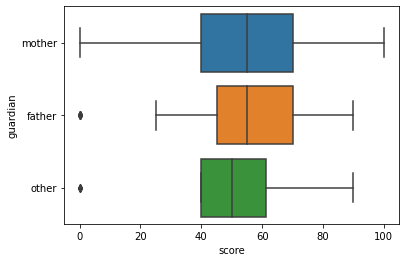

In [18]:
# опекун,заменяем отсутствующие данные модой
stud.guardian.fillna(stud.guardian.mode()[0], inplace=True)
stud.guardian.value_counts()

# посмотрим на распределение признака
sns.boxplot(x='score', y='guardian',
            data=stud)
stud.guardian.describe()
# у студентов, чьми опекунами являются мать или отец показатеи выше

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

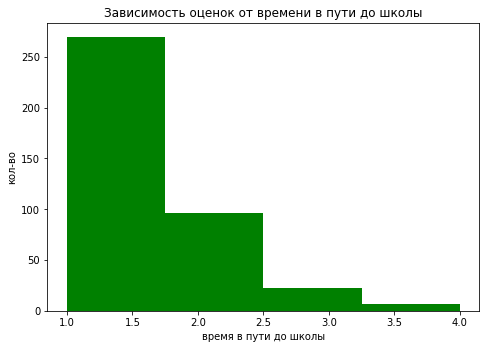

In [19]:
# время в пути до школы
# заменим пустые значения на моду
stud.traveltime.fillna(stud.traveltime.mode()[0], inplace=True)
stud.traveltime.value_counts()

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['traveltime'], bins=4, color='green')
axes.set_title('Зависимость оценок от времени в пути до школы')
axes.set_ylabel('кол-во')
axes.set_xlabel('время в пути до школы')
stud.traveltime.describe()

# студенты, живущих ближе к школе - больше

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

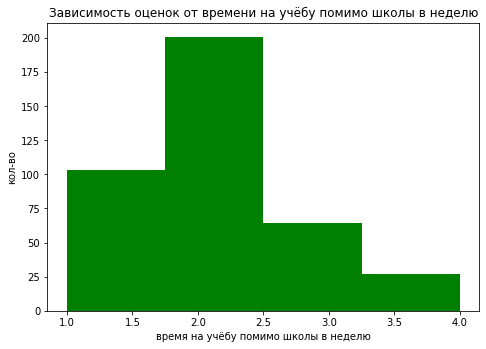

In [20]:
# время на учёбу помимо школы в неделю
stud.studytime.fillna(stud.studytime.mode()[0], inplace=True)
stud.studytime.value_counts()

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['studytime'], bins=4, color='green')
axes.set_title('Зависимость оценок от времени на учёбу помимо школы в неделю')
axes.set_ylabel('кол-во')
axes.set_xlabel('время на учёбу помимо школы в неделю')
stud.studytime.describe()

# большинство студентов  тратят на учебу 2-2,5 часа

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Text(0.5, 0, 'количество внеучебных неудач')

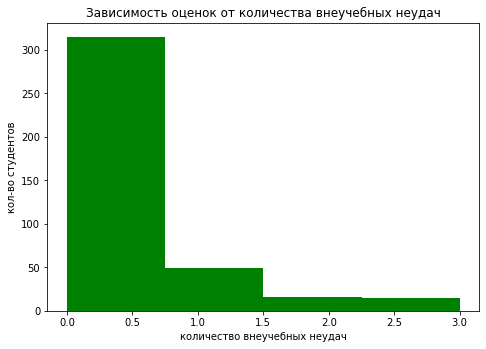

In [21]:
# количество внеучебных неудач
stud.failures.fillna(stud.failures.mode()[0], inplace=True)
display(stud.failures.value_counts())

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['failures'], bins=4, color='green')
axes.set_title('Зависимость оценок от количества внеучебных неудач')
axes.set_ylabel('кол-во студентов')
axes.set_xlabel('количество внеучебных неудач')

# большинство студентов не имеют внеучебных неудач

no     344
yes     51
Name: schoolsup, dtype: int64

<AxesSubplot:xlabel='score', ylabel='schoolsup'>

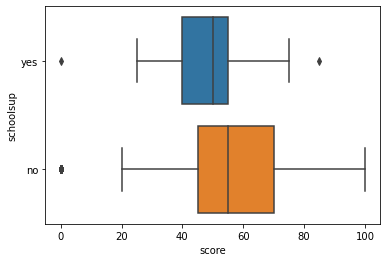

In [22]:
# дополнительная образовательная поддержка
stud.schoolsup.fillna(stud.schoolsup.mode()[0], inplace=True)
stud.schoolsup.value_counts()
display(stud.schoolsup.value_counts())

# рассмотрим распределение признака
sns.boxplot(x='score', y='schoolsup',
            data=stud)
# есть выбросы, но большинство студентов, получающих хороший балл, учатся самостоятельно

<AxesSubplot:xlabel='score', ylabel='famsup'>

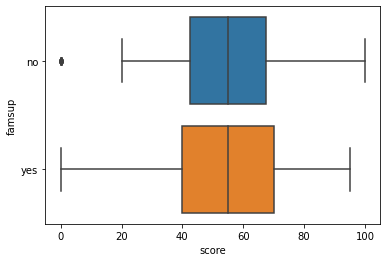

In [23]:
# семейная образовательная поддержка
stud.famsup.fillna(stud.famsup.mode()[0], inplace=True)
stud.famsup.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.famsup.value_counts())
sns.boxplot(x='score', y='famsup',
            data=stud)
# средний балл одинаковый по группе, мы видим, что студенты, которые занимаются с родителями имеют больший размех в оценках
# оно и понятно, если студет получил не высокий балл- нужна помощь

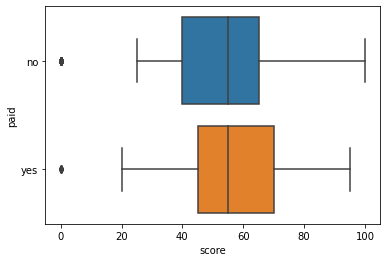

In [22]:
# дополнительные платные занятия по математике
stud.paid.fillna(stud.paid.mode()[0], inplace=True)
stud.paid.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.paid.value_counts())
sns.boxplot(x='score', y='paid',
            data=stud)
# студенты занимающиеся дополнительно - имеют балл выше

<AxesSubplot:xlabel='score', ylabel='activities'>

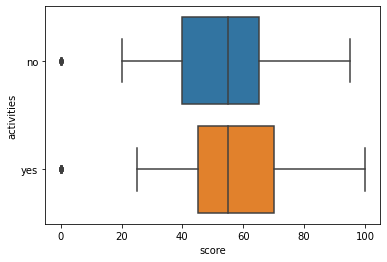

In [26]:
# дополнительные внеучебные занятия
stud.activities.fillna(stud.activities.mode()[0], inplace=True)
stud.activities.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.activities.value_counts())
sns.boxplot(x='score', y='activities',
            data=stud)
# боксплот говорит нам, что некоторые студенты которые разносторонне развиваются учатся немного лучше,
# но средний бал у групп одинаковый

<AxesSubplot:xlabel='score', ylabel='nursery'>

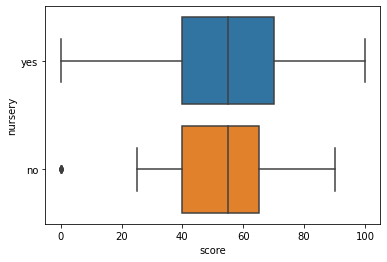

In [27]:
# детский сад
stud.nursery.fillna(stud.nursery.mode()[0], inplace=True)
stud.nursery.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.nursery.value_counts())
sns.boxplot(x='score', y='nursery',
            data=stud)
# Средний балл обоих групп одинаковый

count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

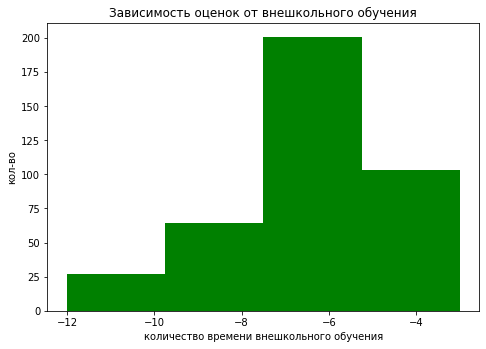

In [28]:
# granular
# мы не знаем, что это за признак, сделаем выводы позже
stud.studytime_granular.fillna(stud.studytime_granular.mode()[0], inplace=True)
stud.studytime_granular.value_counts()

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['studytime_granular'], bins=4, color='green')
axes.set_title('Зависимость оценок от внешкольного обучения')
axes.set_ylabel('кол-во')
axes.set_xlabel('количество времени внешкольного обучения')
stud.studytime_granular.describe()


<AxesSubplot:xlabel='score', ylabel='higher'>

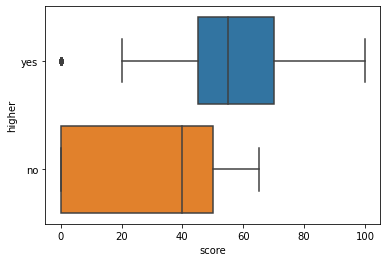

In [29]:
# высшее образование
stud.higher.fillna(stud.higher.mode()[0], inplace=True)
stud.higher.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.higher.value_counts())
sns.boxplot(x='score', y='higher',
            data=stud)

# очевидно, что студенты расчтывающие получить Высшее образование, стараются лучше

<AxesSubplot:xlabel='score', ylabel='internet'>

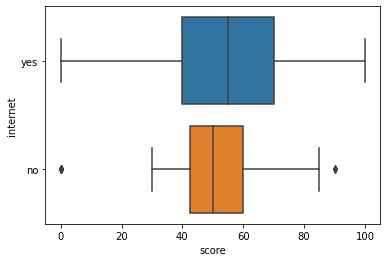

In [30]:
# наличие интернета дома
stud.internet.fillna(stud.internet.mode()[0], inplace=True)
stud.internet.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.internet.value_counts())
sns.boxplot(x='score', y='internet',
            data=stud)
# у нас есть выбросы; студенты имеющие доступ в интернет учатся лучше

<AxesSubplot:xlabel='score', ylabel='romantic'>

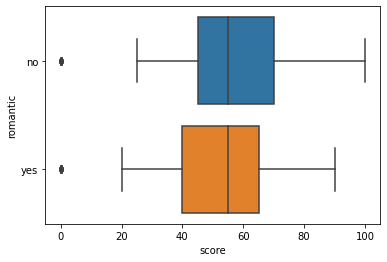

In [31]:
# в романтических отношениях
stud.romantic.fillna(stud.romantic.mode()[0], inplace=True)
stud.romantic.value_counts()

# посмотрим на распределение признака
pd.DataFrame(stud.romantic.value_counts())
sns.boxplot(x='score', y='romantic',
            data=stud)
# средний балл учеников в отношениях и без одинаковый,
# но группа учеников не состоящих в отношениях показывыют лучший результат

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Text(0.5, 0, 'семейные отношения')

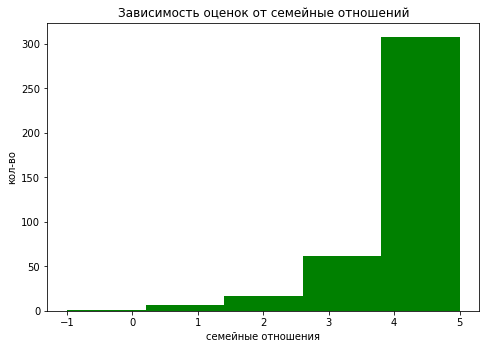

In [32]:
# семейные отношения
# заполним недостаюшие значения
stud.famrel.fillna(stud.famrel.mode()[0], inplace=True)
display(stud.famrel.value_counts())

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['famrel'], bins=5, color='green')
axes.set_title('Зависимость оценок от семейные отношений')
axes.set_ylabel('кол-во')
axes.set_xlabel('семейные отношения')


# учеников с благоприятной обстановкой в семье - больше

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

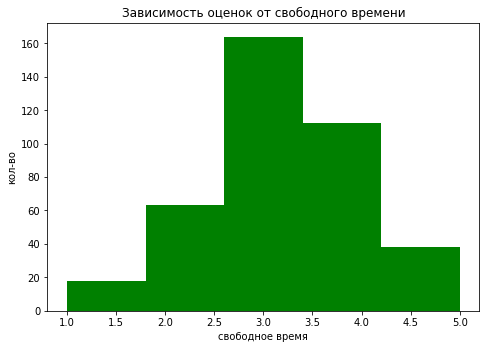

In [33]:
# свободное время после школы
# заполним недостаюшие значения

stud.freetime.fillna(stud.freetime.mode()[0], inplace=True)
display(stud.freetime.value_counts())

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['freetime'], bins=5, color='green')
axes.set_title('Зависимость оценок от свободного времени')
axes.set_ylabel('кол-во')
axes.set_xlabel('свободное время')
stud.freetime.describe()

# основная масса студентов имеет достаточно свободного времени

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

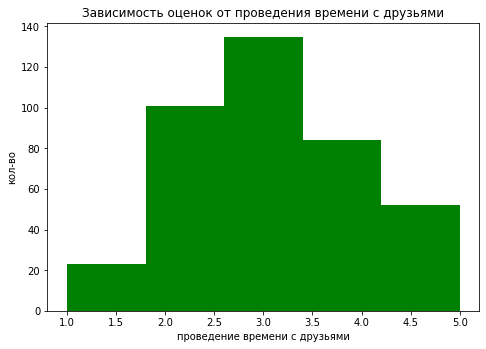

In [34]:
# проведение времени с друзьями
# заполним недостаюшие значения

stud.goout.fillna(stud.goout.mode()[0], inplace=True)
display(stud.goout.value_counts())

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['goout'], bins=5, color='green')
axes.set_title('Зависимость оценок от проведения времени с друзьями')
axes.set_ylabel('кол-во')
axes.set_xlabel('проведение времени с друзьями')
stud.goout.describe()


5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    395.000000
mean       3.587342
std        1.397729
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

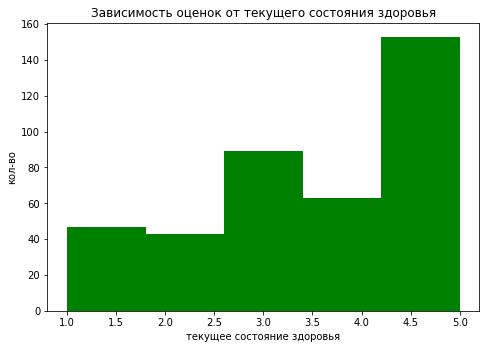

In [35]:
# текущее состояние здоровья
# заполним недостаюшие значения

stud.health.fillna(stud.health.mode()[0], inplace=True)
display(stud.health.value_counts())

# посмотрим на распределение признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['health'], bins=5, color='green')
axes.set_title('Зависимость оценок от текущего состояния здоровья')
axes.set_ylabel('кол-во')
axes.set_xlabel('текущее состояние здоровья')
stud.health.describe()
# смещенное влево распределение признака

count    372.000000
mean       4.591398
std        4.915977
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

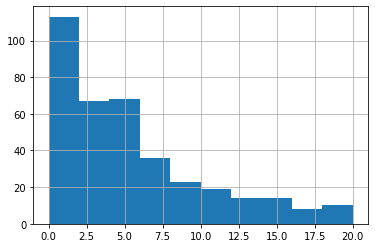

In [40]:
# количество пропущенных занятий
# заменим пустые значения медианой
stud.absences.fillna(stud.absences.median(), inplace=True)
stud.absences.hist()
stud.absences.describe()
# очень высокое стандартное отклонение говорит нам о том, что у некоторых учеников очень много пропущенных занятий

count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

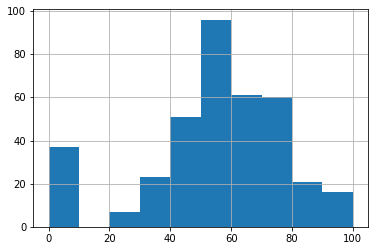

In [41]:
# баллы по госэкзамену по математике, есть пропущение значения
stud.score.hist()
stud.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


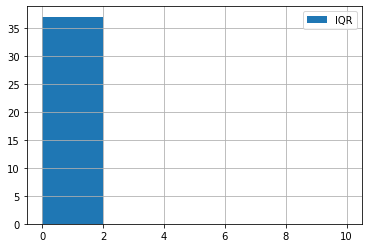

In [42]:
# удалим выбросы

IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud.score.loc[stud.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=5, range=(0, 10), label='IQR')

plt.legend()
stud = stud.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [43]:
# мы удалили 5% данных от всего DF
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              372 non-null    object 
 1   sex                 372 non-null    object 
 2   age                 372 non-null    int64  
 3   address             372 non-null    object 
 4   famsize             372 non-null    object 
 5   Pstatus             372 non-null    object 
 6   Medu                372 non-null    float64
 7   Fedu                372 non-null    float64
 8   Mjob                372 non-null    object 
 9   Fjob                372 non-null    object 
 10  reason              372 non-null    object 
 11  guardian            372 non-null    object 
 12  traveltime          372 non-null    float64
 13  studytime           372 non-null    float64
 14  failures            372 non-null    float64
 15  schoolsup           372 non-null    object 
 16  famsup  

In [44]:
# Ищем статитистически важные значения для номинативных переменных

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

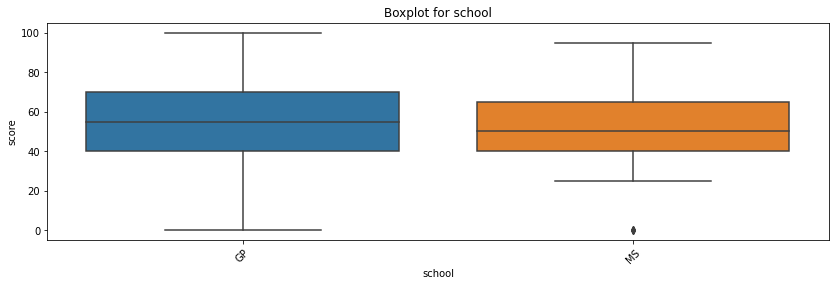

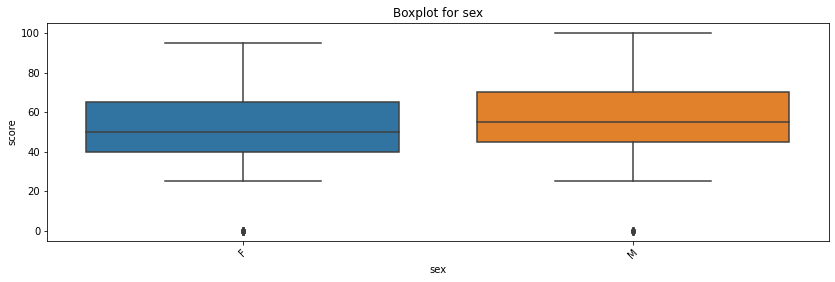

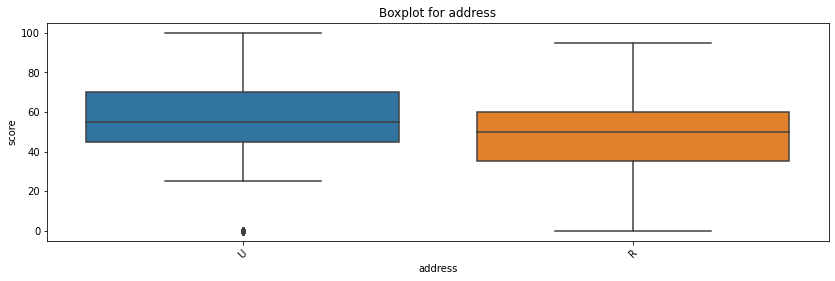

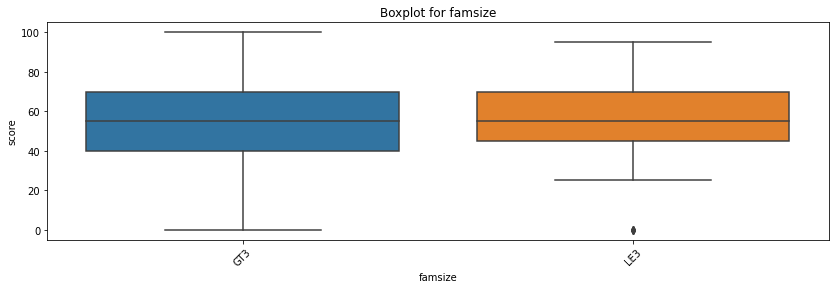

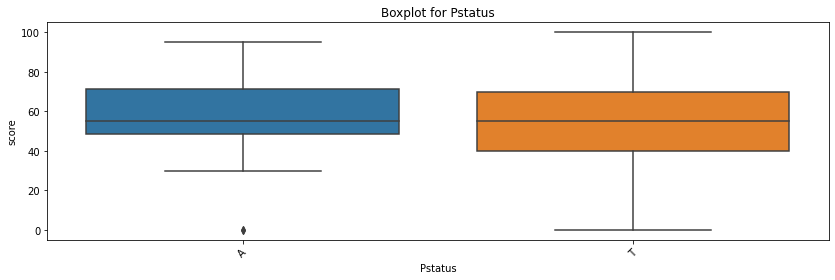

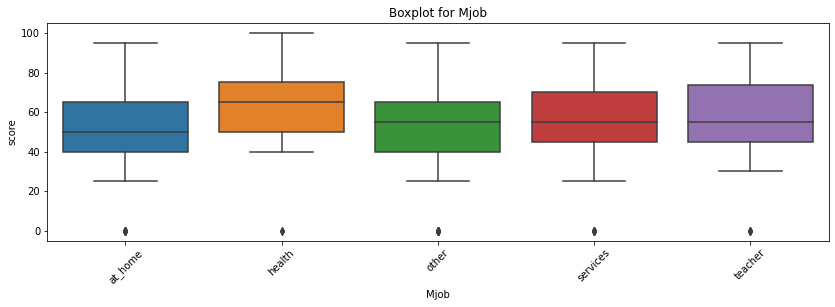

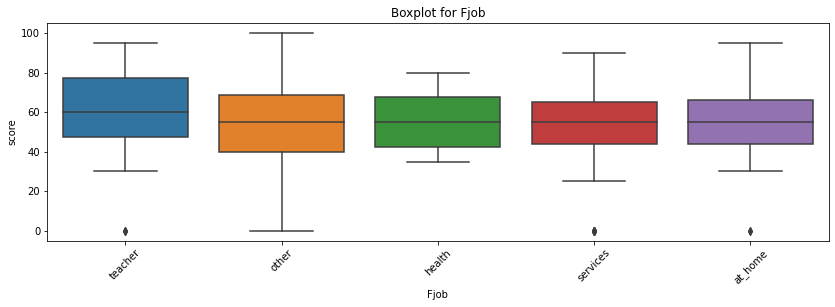

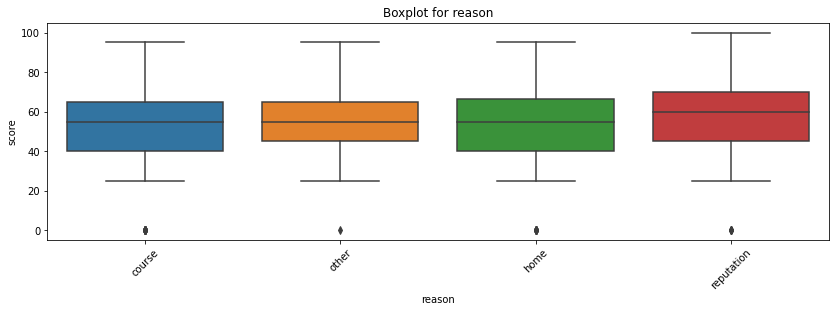

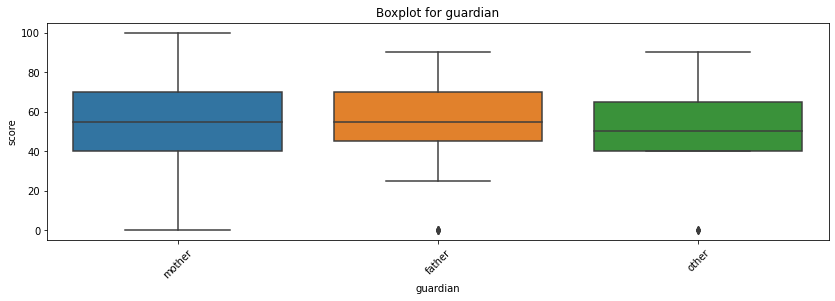

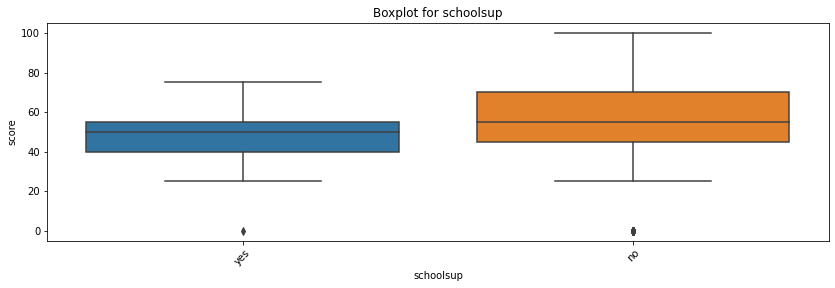

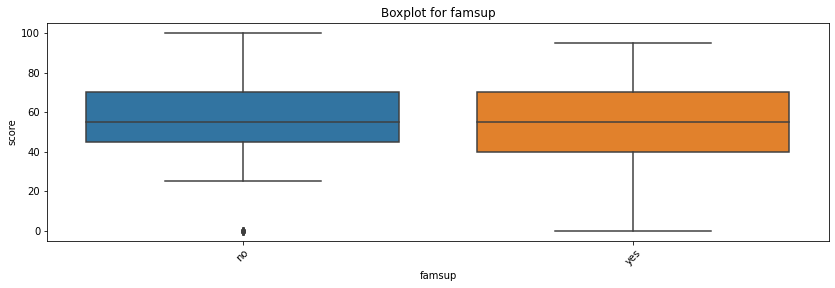

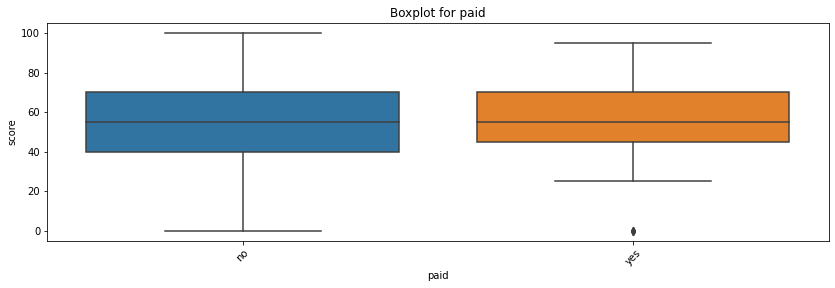

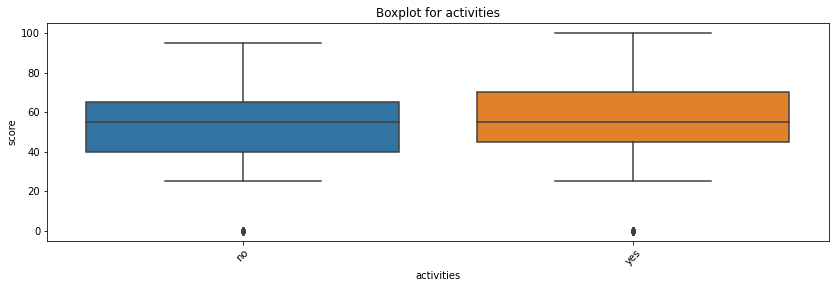

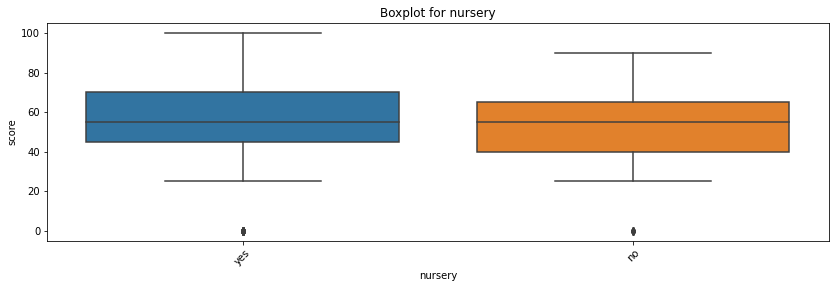

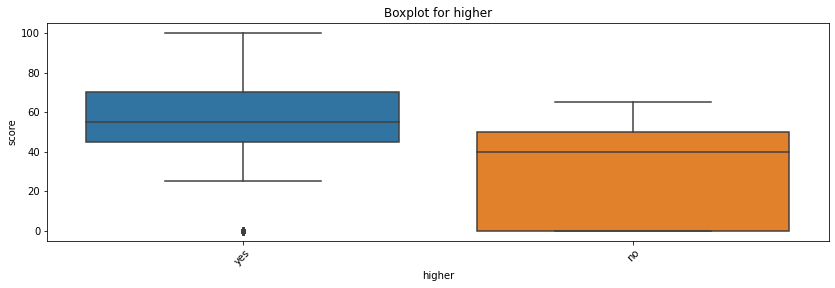

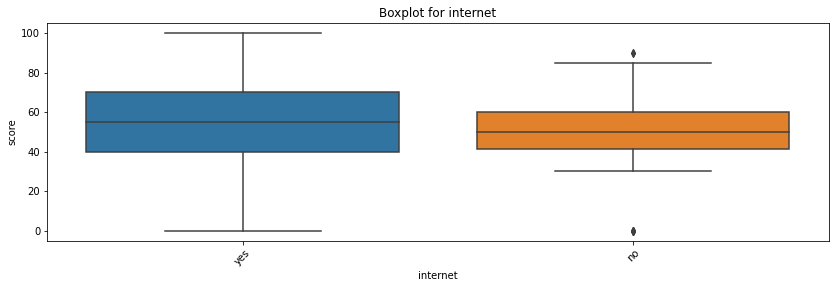

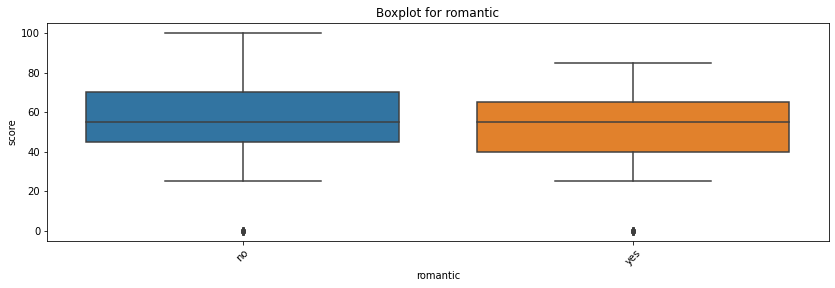

In [45]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [119]:
# выявим стат. значимые колонки с помощью теста:

In [120]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [121]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


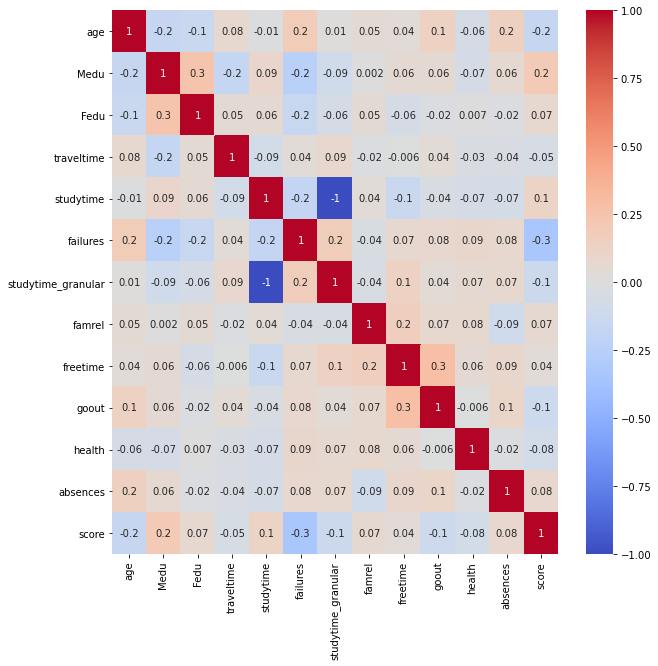

In [48]:
# Ищем статитистически важные значения для количественных переменных
sns.heatmap(stud.corr(), annot=True, cmap='coolwarm',
            fmt='.1g', vmin=-1, vmax=1, center=0)

fig = plt.gcf()
fig.set_size_inches(10, 10)

In [50]:
# мы видим сильную корреляцию между столбцами, удалим один из них и посмотрим еще раз
stud.drop('studytime_granular', axis=1, inplace=True)

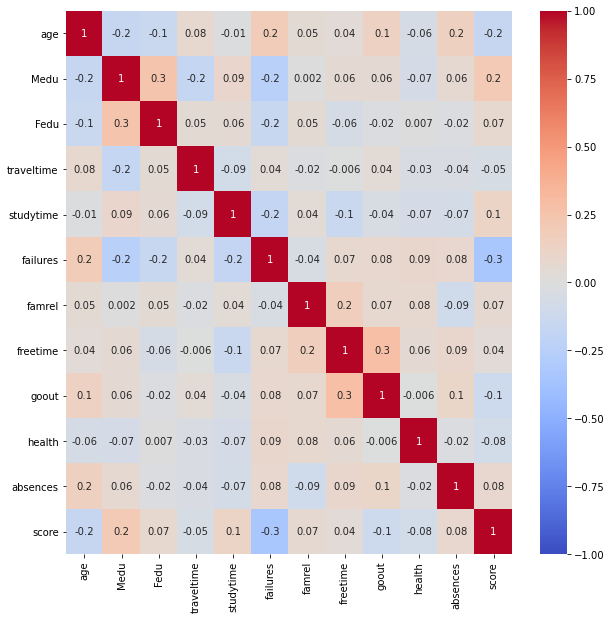

In [51]:
sns.heatmap(stud.corr(), annot=True, cmap='coolwarm',
            fmt='.1g', vmin=-1, vmax=1, center=0)

fig = plt.gcf()
fig.set_size_inches(10, 10)
# других значимых корреляций нет

<AxesSubplot:xlabel='absences'>

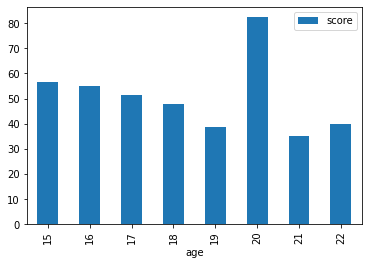

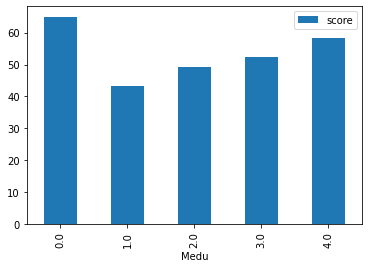

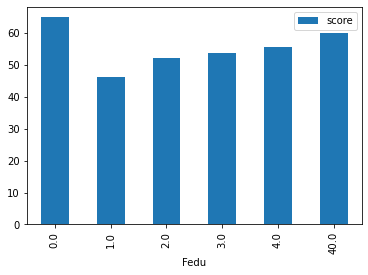

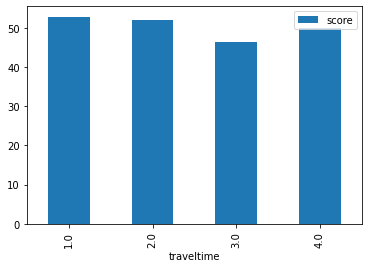

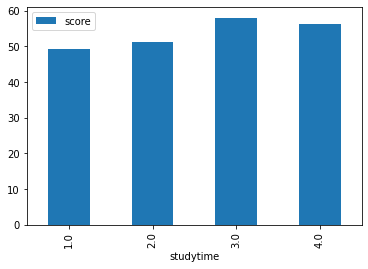

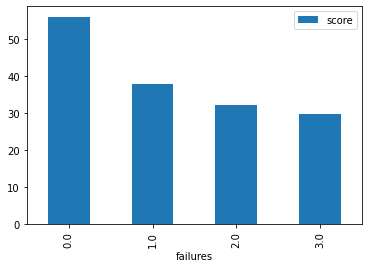

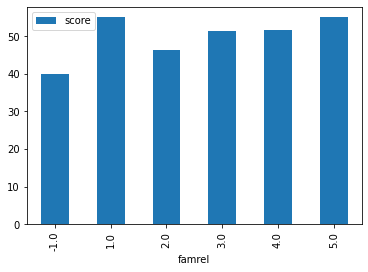

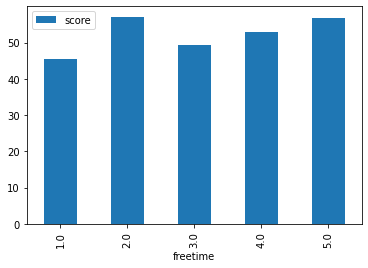

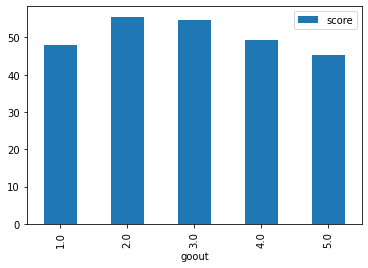

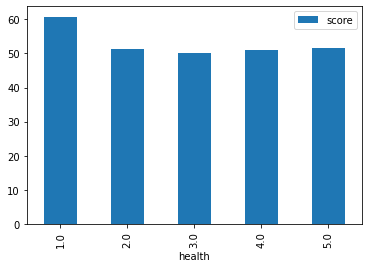

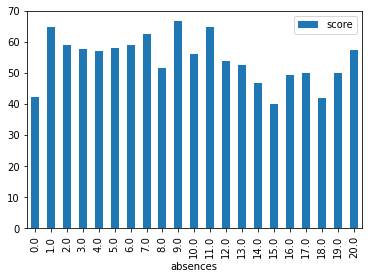

In [58]:
# посмотрим, какие данные влияют на оценку:

stud.pivot_table(values=['score'],
                 index='age',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='Medu',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='Fedu',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='traveltime',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='studytime',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='failures',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='famrel',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='freetime',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='goout',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='health',
                 aggfunc='mean').plot(kind='bar')

stud.pivot_table(values=['score'],
                 index='absences',
                 aggfunc='mean').plot(kind='bar')

In [59]:
# Делаем вывод, что для построения модели можно выделить следующие данные:
# sex
# address
# Mjob
# paid
# higher
# romantic
# activities
# internet
# schoolsup
# потому что на боксплотах и по результатам теста видны различия

# по номинативным переменным мы видим значимые различия в следующих переменных:
# failures
# age
# Medu
# Fedu
# studytime
# freetime
# goout
# absences